In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [28]:
wine = pd.read_csv('/cxldata/datasets/project/wine_quality_red.csv')

In [29]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


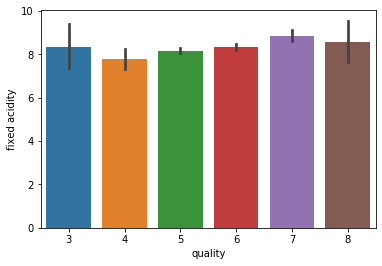

In [31]:
# plot to know the dataset distribution

sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

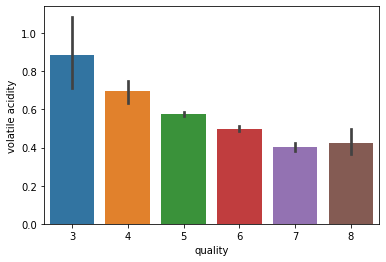

In [32]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

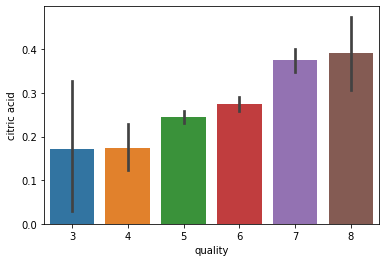

In [33]:
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

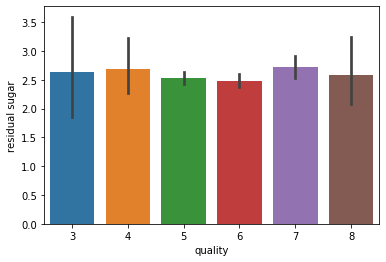

In [34]:
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

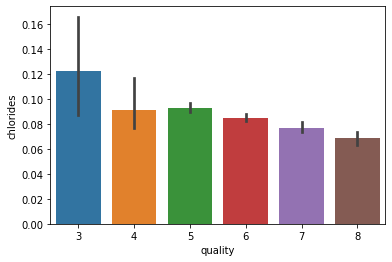

In [35]:
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

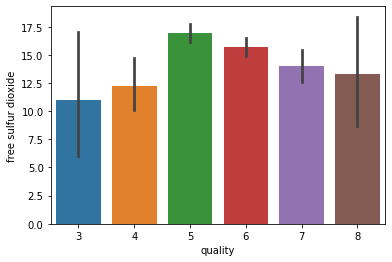

In [36]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

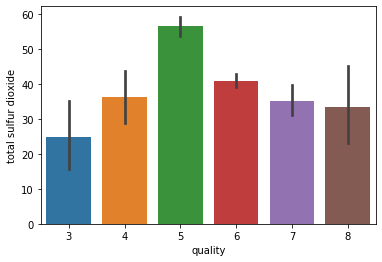

In [37]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

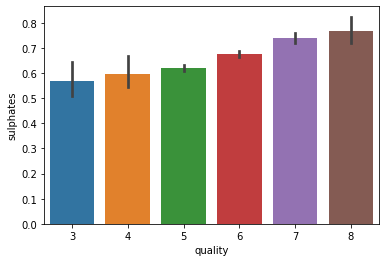

In [38]:
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

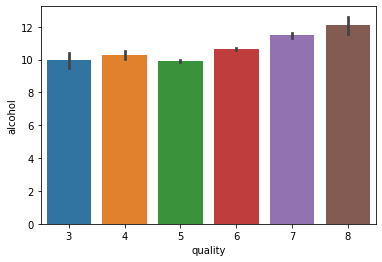

In [39]:
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [40]:
# making binary classification for response variable
# dividing wine as good and bad by giving the limit for the quality

bins =(2,6.5,8)
group_names = ['bad' , 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [41]:
# assign labels to our quality variable
label_quality = LabelEncoder()

In [42]:
# bad =0, good = 1
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [43]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

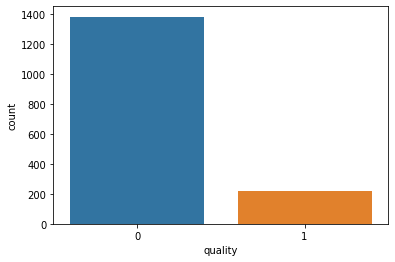

In [44]:
sns.countplot(wine['quality'])

In [45]:
# separating the dataset as response and feature variables

x = wine.drop('quality', axis =1)
y = wine['quality']

In [46]:
# with sklearn train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, 
                                       random_state = 42)

In [47]:
# Applying standard scaling to get aptimized result

sc = StandardScaler()

In [48]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<b> Training of Models </b>

In [49]:
# Train Models RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [50]:
#check classification_report model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       347
           1       0.69      0.38      0.49        53

    accuracy                           0.90       400
   macro avg       0.80      0.68      0.71       400
weighted avg       0.88      0.90      0.88       400



In [51]:
# confusion matrix for the random forest classification

print(confusion_matrix(y_test, pred_rfc))

[[338   9]
 [ 33  20]]


In [52]:
# Stochastic Gradient Decent Classifier
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [53]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       347
           1       0.42      0.28      0.34        53

    accuracy                           0.85       400
   macro avg       0.66      0.61      0.63       400
weighted avg       0.83      0.85      0.84       400



In [54]:
print(confusion_matrix(y_test, pred_sgd))

[[326  21]
 [ 38  15]]


In [55]:
#Support Vector Classifier

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [56]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       347
           1       0.70      0.26      0.38        53

    accuracy                           0.89       400
   macro avg       0.80      0.62      0.66       400
weighted avg       0.87      0.89      0.86       400



<b>increase accuracy of our models </b>

In [57]:
# Grid Search CV

#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [59]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [60]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.3, 'gamma': 0.8, 'kernel': 'rbf'}

In [61]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.3, gamma =  0.8, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       347
           1       0.81      0.42      0.55        53

    accuracy                           0.91       400
   macro avg       0.87      0.70      0.75       400
weighted avg       0.90      0.91      0.90       400



SVC improves accuracy from 89% to 91% using Grid Search CV

<b>Cross Validation Score for random forest and SGD</b>

In [63]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9124509803921569

Random forest accuracy increases from 90% to 91 % using cross validation score